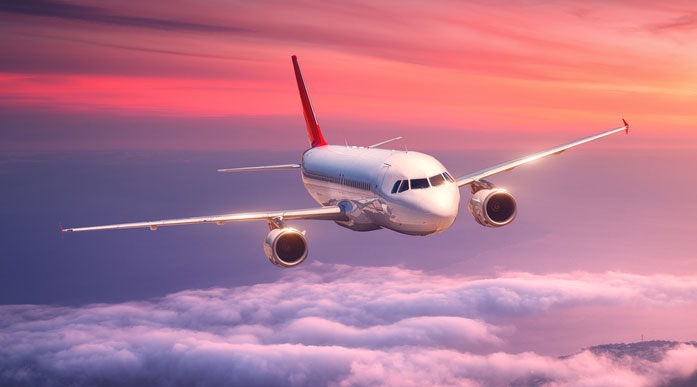# 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_excel(r'./Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [9]:
# proportion of count data of each categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
----------------------------
18/05/2019    4.717776
6/06/2019     4.708415
21/05/2019    4.652251
9/06/2019     4.633530
12/06/2019    4.614809
9/05/2019     4.530563
21/03/2019    3.959562
15/05/2019    3.791070
27/05/2019    3.575775
27/06/2019    3.323037
24/06/2019    3.285594
1/06/2019     3.201348
3/06/2019     3.117102
15/06/2019    3.070299
24/03/2019    3.023495
6/03/2019     2.883085
27/03/201

# Univariate Analysis

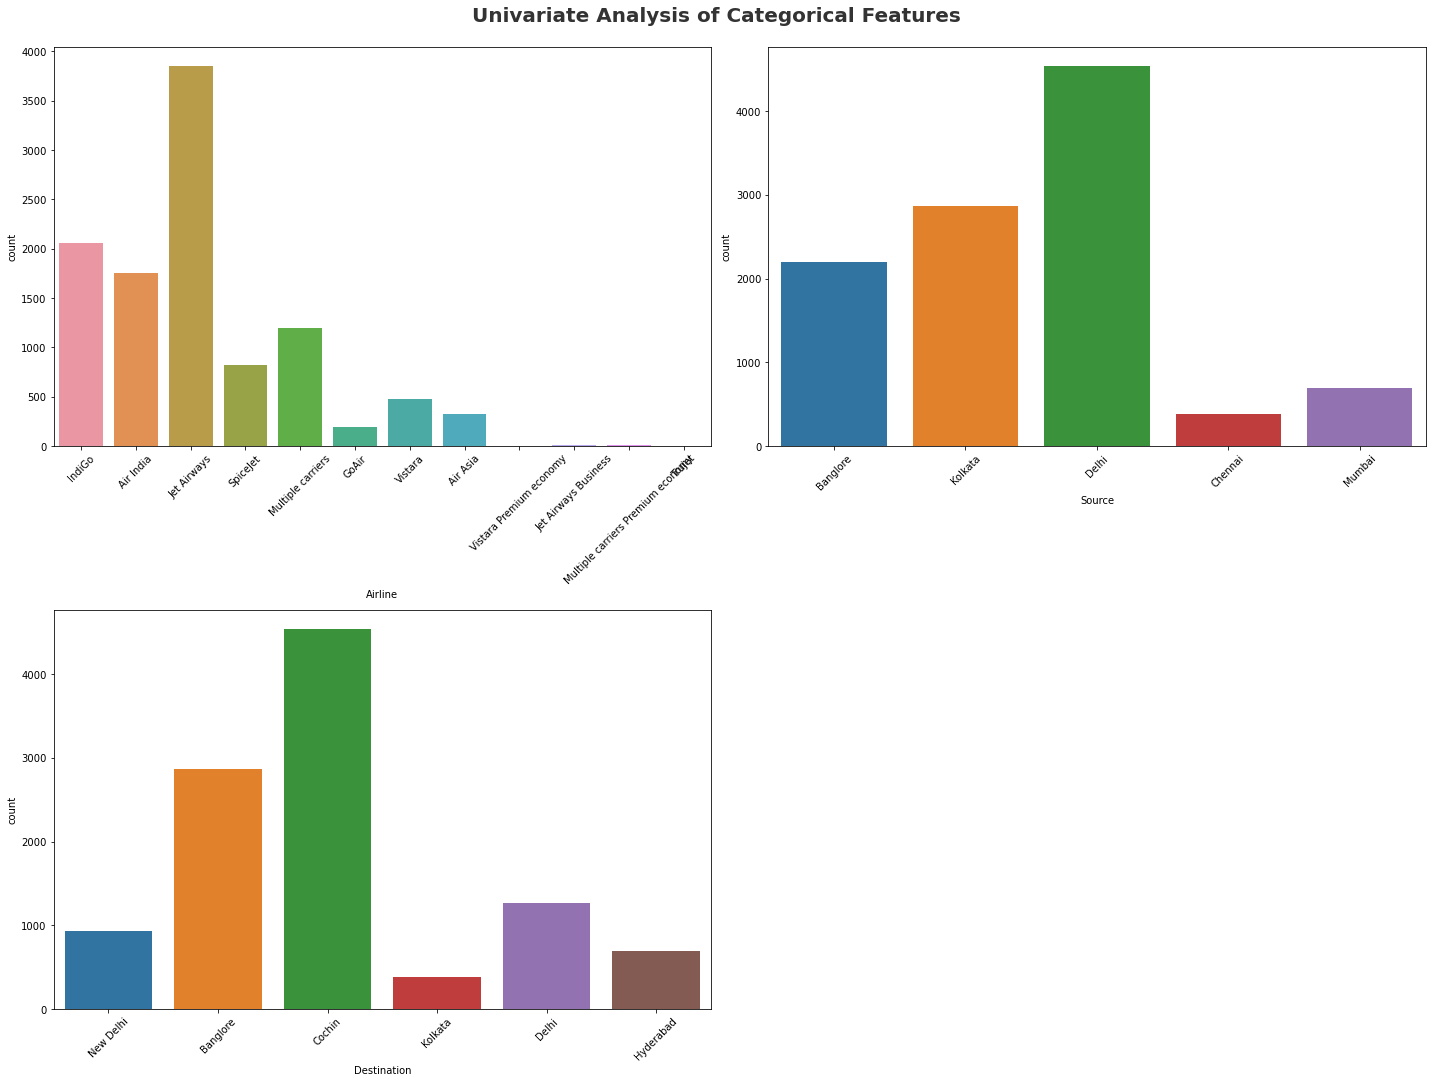

In [11]:
# categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Multivariate Analysis


In [12]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'],df[feature]))[1] <0.05:
        chi2_test.append('Rejet Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Rejet Null Hypothesis
1,Date_of_Journey,Rejet Null Hypothesis
2,Source,Rejet Null Hypothesis
3,Destination,Rejet Null Hypothesis
4,Route,Rejet Null Hypothesis
5,Dep_Time,Rejet Null Hypothesis
6,Arrival_Time,Rejet Null Hypothesis
7,Duration,Rejet Null Hypothesis
8,Total_Stops,Rejet Null Hypothesis
9,Additional_Info,Rejet Null Hypothesis


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Initial Analysis Report

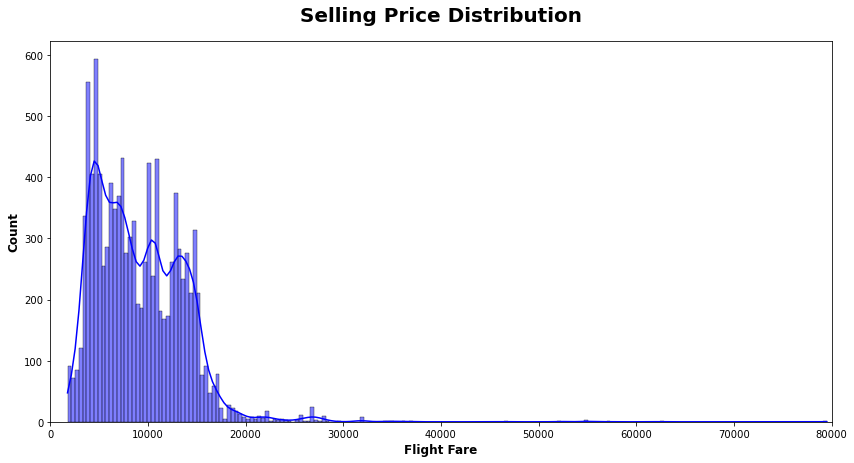

In [16]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

# Top 10 Aviation Companies whose flight tickets are sold the most ?

In [17]:
df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

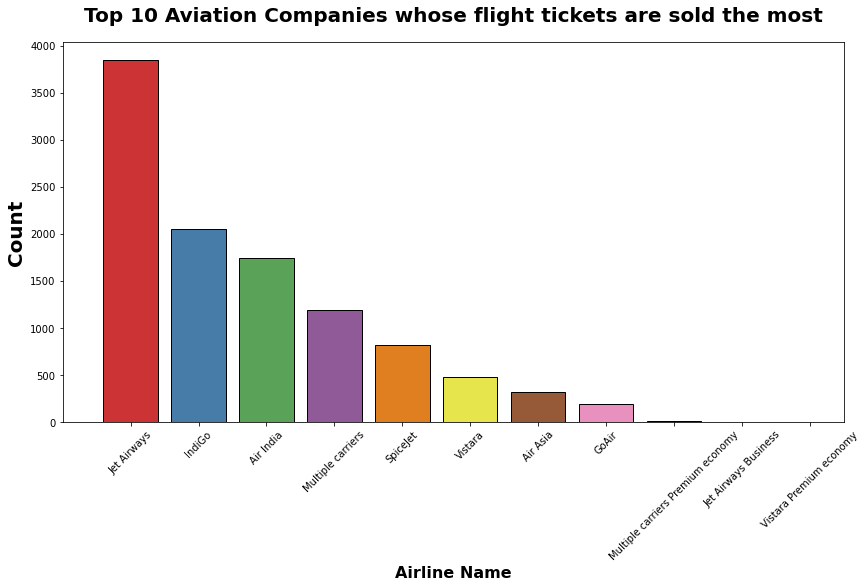

In [18]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [19]:
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

The mean price of Jet Airways Flight Tickets  is 11643.92 Rupees


In [20]:
aviation_company_airline = df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


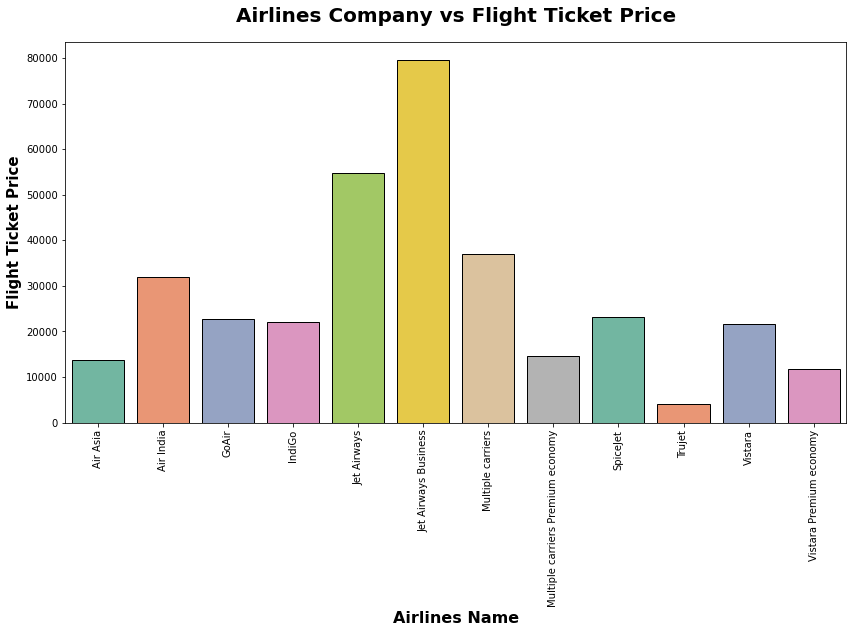

In [21]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Extracting Date & Month from Date of Journey Column

In [22]:
df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day
df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [24]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [25]:
# Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Dep_Time'],axis=1,inplace=True)

In [26]:
# Extracting Hours
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [27]:
# Assigning and converting Duration column into list to extract hours ans minutes seperately
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

#we will remove the Durtaion column
df.drop(['Duration'],axis=1,inplace=True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Boxplots

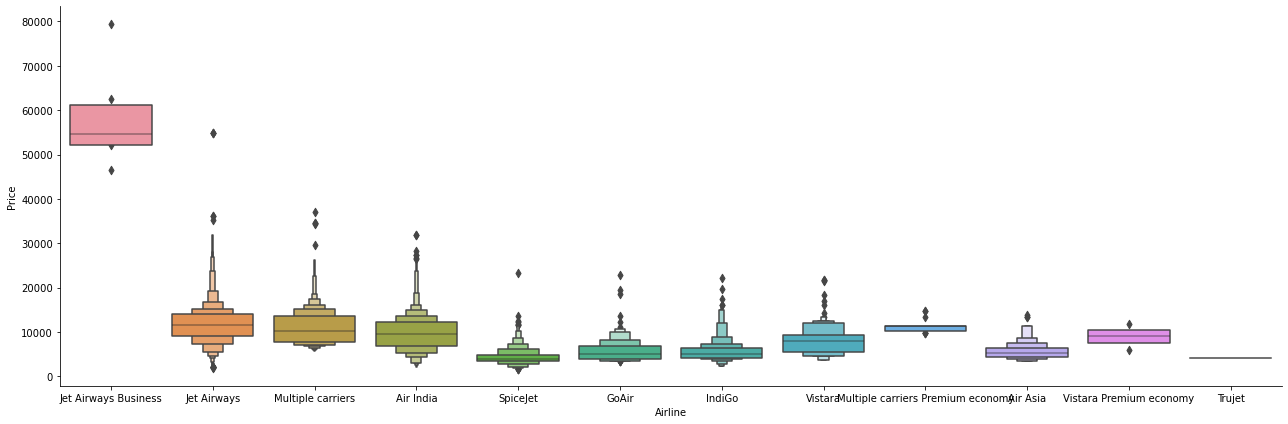

In [30]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [31]:
#OneHotEncoding -----> Nominal data
Airline = df[["Airline"]]
Airline = pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


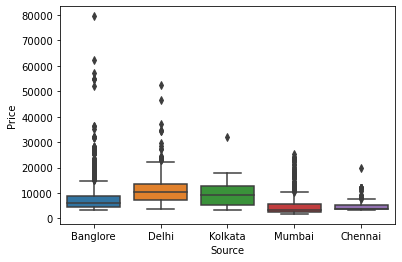

In [32]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

In [33]:
#OneHotEncoding -----> Nominal data
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [36]:
df['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


<AxesSubplot:>

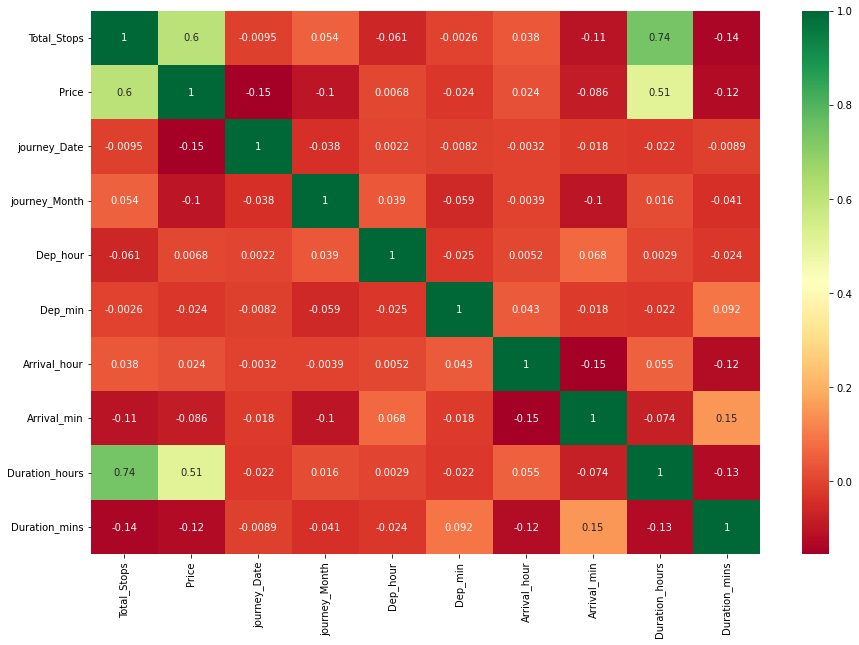

In [37]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [38]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Importing test data:

In [39]:
test_data= pd.read_excel(r'./Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
# Preprocessing
print(test_data.info())
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

# Categorical data
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

# Now we Will Build a Machine Learning Model Using Random Forest Algorithm

In [41]:
x= data_train[['Total_Stops', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
y=data_train['Price']

In [43]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

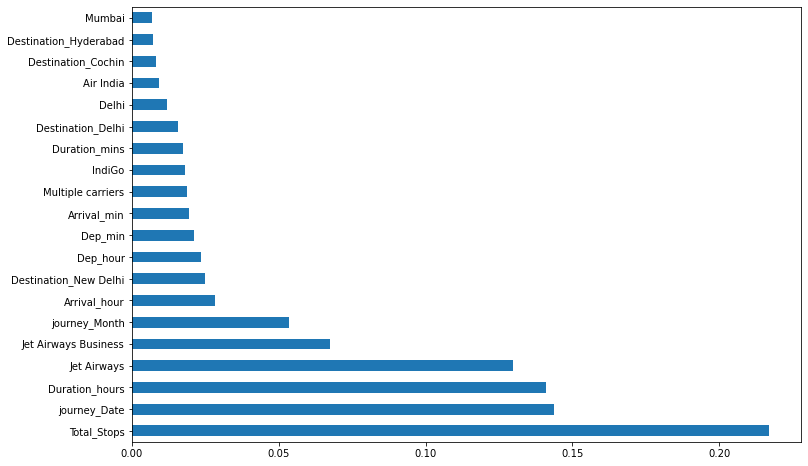

In [44]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [45]:
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deifne feature selection
fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(x,y)

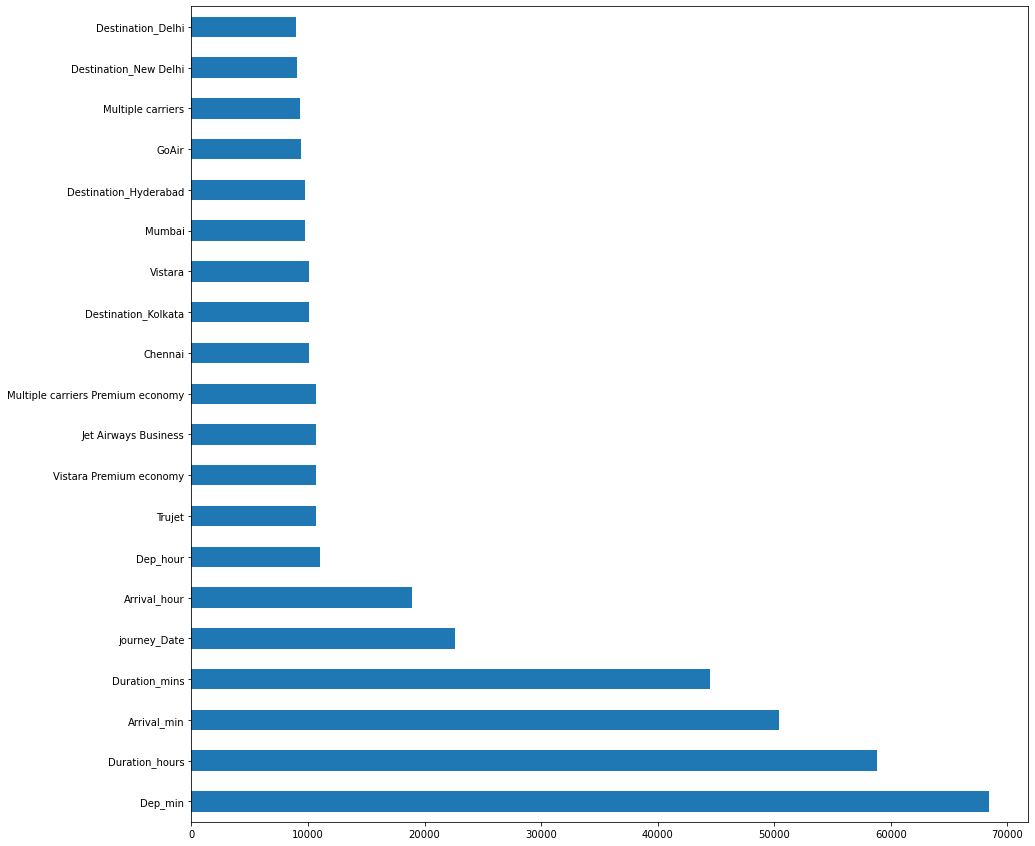

In [46]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
#Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

In [48]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [49]:
random_forest.fit(x_train,y_train)

RandomForestRegressor()

# R2

In [50]:
random_forest.score(x_test,y_test)

0.8159280745867032

In [51]:
random_forest.score(x_train,y_train)

0.9550488945441171

In [52]:
y_pred=random_forest.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

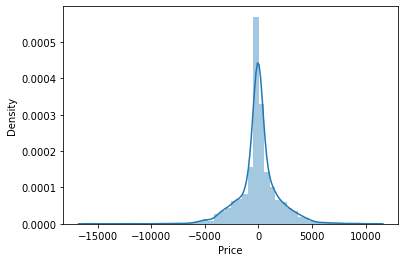

In [53]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-y_pred,kde=True)

Text(0, 0.5, 'prediction')

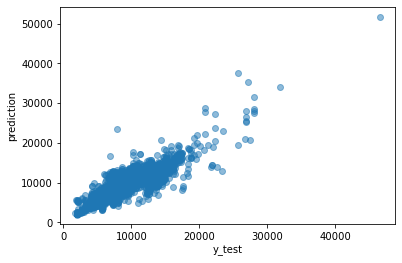

In [54]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

#  Hyperparameter Tuning for better Accuracy

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [56]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [58]:
random_search=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid_params,cv=5,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error', n_iter = 10,)
#random_search

In [59]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 15, 19, 22, 26,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             25, 30, 35],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              120, 150, 200,
                                                              250],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_

In [63]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [64]:
random_forest_regresor=RandomForestRegressor(n_estimators=300,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15)

In [67]:
random_forest_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [66]:
random_forest_regresor.score(x_train,y_train)

0.8980352858396646

# R2 SCORE

In [68]:
random_forest_regresor.score(x_test,y_test)

0.8438777986142395

In [69]:
prediction=random_forest_regresor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

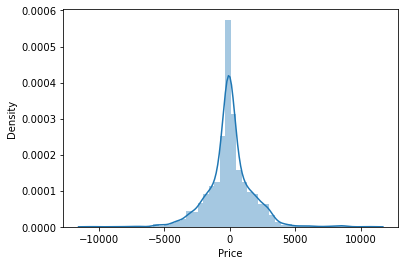

In [70]:
sns.distplot(y_test-prediction,kde=True)

Text(0, 0.5, 'prediction')

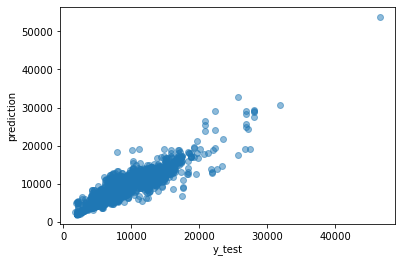

In [71]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [72]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1146.2482714504486
MSE: 2933049.7875755797
RMSE: 1712.6148976274787


In [73]:
import pickle
file = open('flightfarepred.pkl', 'wb')
pickle.dump(random_forest_regresor, file)

In [74]:
model = open('flight_fare_pred.pkl','rb')
flight_fare_pedictor = pickle.load(model)

In [75]:
flight_fare_pedictor.score(x_test,y_test)

0.8449350657879965

In [76]:
x_test

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8396,2,24,6,18,20,4,25,10,5,0,...,0,0,1,0,0,1,0,0,0,0
9284,1,9,6,17,30,12,35,19,5,0,...,0,0,1,0,0,1,0,0,0,0
10609,0,12,5,12,0,13,30,1,30,0,...,0,0,0,0,1,0,0,1,0,0
10229,0,3,3,19,35,22,5,2,30,0,...,0,0,0,1,0,0,0,0,0,0
3874,1,27,3,2,15,15,30,13,15,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0,24,3,23,30,2,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
5663,1,6,5,11,35,18,50,7,15,0,...,0,0,0,1,0,0,0,0,0,0
8332,0,27,6,11,30,14,5,2,35,0,...,0,0,0,1,0,0,0,0,0,0
10453,2,24,6,9,40,12,35,26,55,0,...,0,0,1,0,0,1,0,0,0,0


In [77]:
y_prediction = flight_fare_pedictor.predict(x_test)

In [78]:
y_prediction

array([13619.88912187, 11332.43145858,  3158.9423604 , ...,
        4907.67915001, 11188.03935408,  7597.34463031])